# <center>Logistic Regression</center>

## Logistic Regression without Regularization

Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as op

Read the file containing two exam scores and the admission results of students applying to a university

In [2]:
df = pd.read_csv('ex2data1.txt', names=['Exam 1 score', 'Exam 2 score', 'Result'])
df.head()

,Exam 1 score,Exam 2 score,Result
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Visaualize the data using scatterplot

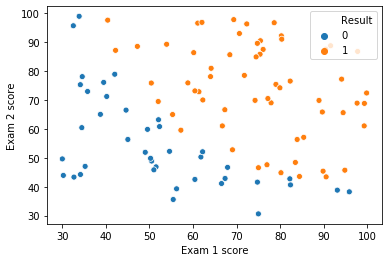

In [3]:
sns.scatterplot(x=df['Exam 1 score'], y=df['Exam 2 score'], hue=df['Result'])

The logistic regression hypothesis is defined as
$$ h_\theta(x) = g(\theta^Tx) $$
where g is the Sigmoid function
$$ g(z) = \frac{1}{1 + e^{-z}} $$
Let's implement sigmoid function which will be used in logistic regression analysis

In [4]:
def sigmoid(z):
    return (1/(1+(np.exp(-z))))

Testing the sigmoid function for values -10 to +10

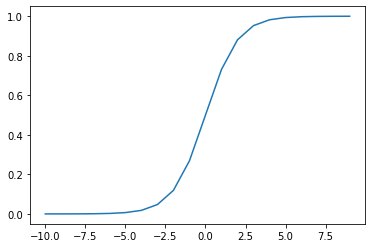

In [5]:
sns.lineplot(x=np.arange(-10, 10), y=sigmoid(np.arange(-10, 10)))

### Fit using Gradient Descent

Cost function for logistic regression
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)})] $$

In [77]:
def computecost(theta, X, y):
    # Reshape the theta vector into 2D array 
    theta = theta.reshape((numFeatures,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute the cost value
    cost_a = y * np.log(yhat)
    cost_b = (1 - y) * np.log(1 - yhat)
    cost = (np.sum(cost_a) + np.sum(cost_b))/(-X.shape[0])
    return cost  

Initialize X, y and calculate example cost for zero $\theta$ vector

In [79]:
X = np.array(df[['Exam 1 score', 'Exam 2 score']])
X = np.hstack((np.ones((X.shape[0], 1)), X))
y = np.array(df[['Result']])

numFeatures = X.shape[1]
theta = np.zeros((numFeatures, 1))
computecost(theta, X, y)

0.6931471805599453

Update $\theta$ vector as follows in the gradient descent
$$ \theta_j = \theta_j - \alpha\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}] $$

In [81]:
def updatetheta(X, y, theta, alpha):
   # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute error vector
    diff = yhat-y
    
    # Compute gradient and update theta
    gradient = np.dot(X.T, diff)
    theta = theta - (gradient*alpha)
    return theta

In [84]:
theta = np.zeros((numFeatures, 1))

# Theta and iterations values used here is referred from the link
# https://beckernick.github.io/logistic-regression-from-scratch/
# This shows it is very complex to calculate such parameters, hence the 
# motivation for the advanced optimization shown later
alpha = 5e-5
iterations = 1

for i in range(iterations):
    theta = updatetheta(X, y, theta, alpha)

print("final theta", theta)
print("final cost", computecost(theta, X, y))
testX = np.array([1, 45, 85])
print("The admission probability for a student with exam scores 1 of 45 and exam score 2 of 85 is", sigmoid((testX.dot(theta))))

final theta [[0.0005    ]
 [0.06004608]
 [0.05631421]]
final cost 2.481681340899778
The admission probability for a student with exam scores 1 of 45 and exam score 2 of 85 is [0.99944127]


### Fit using advanced optimization

Use the optimization method in scipy library. This needs the Cost Funcion, Gradiend function , $\theta$, X and y values as parameters.
The gradient for the cost function can be calculated as 
$$Gradient = \frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}]$$

Let's define the cost function and gradient function to be used by the optimization method. The is exactly same as the above cost function with only difference is the $\theta$ vector is passed as 1D array and is converted to 2D array inside. It is this way because the optimization method expects it in that format.

In [12]:
def computecost2(theta, X, y):
    # Reshape the theta vector into 2D array 
    theta = theta.reshape((numFeatures,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute the cost value
    cost_a = y * np.log(yhat)
    cost_b = (ones - y) * np.log(ones - yhat)
    cost = (np.sum(cost_a) + np.sum(cost_b))/(-X.shape[0])
    return cost  

In [82]:
def gradient(theta, X, y):
    # Reshape the theta vector into 2D array
    theta = theta.reshape((numFeatures,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute error vector
    diff = yhat - y
    
    # Compute gradient and return it in 1D format
    grad = (X.T.dot(diff))/(X.shape[0])
    return grad.flatten()

In [ ]:
init_theta = np.zeros(numFeatures)
Result = op.minimize(fun = computecost2, 
                                 x0 = init_theta, 
                                 args = (X, y),
                                 method = 'TNC',
                                 jac = gradient);
optimal_theta = Result.x;
#Result = op.fmin_tnc(func=computecost2, x0=init_theta, fprime=gradient, args=(X, y))
#optimal_theta = Result[0];

testX = np.array([1, 45, 85]).reshape((1, numFeatures))
print("optimal_theta", optimal_theta)
print("final cost", computecost(optimal_theta.reshape((numFeatures, 1)), X, y))
print("The admission probability for a student with exam scores 1 of 45 and exam score 2 of 85 is", sigmoid(testX.dot(optimal_theta.reshape((numFeatures, 1)))))

Let's check the accuracy of the results predicted using the optimal $\theta$ derived using advanced optimization

In [113]:
def predict(theta, X):
    probability = sigmoid(X.dot(theta))
    return [1 if x >= 0.5 else 0 for x in probability]

In [114]:
predictions = predict(optimal_theta, X)
correct = [1 if (a == b) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print('accuracy = {}%'.format(accuracy))

accuracy = 89%


Plot the decision boundary using the calculated intercept and coefficients
Refer to https://datascience.stackexchange.com/questions/49573/how-to-plot-logistic-regression-decision-boundary
for plotting decision boundary line
$$x_2 = -\frac{\theta_1}{\theta_2}x_1 -\frac{\theta_0}{\theta_2}$$

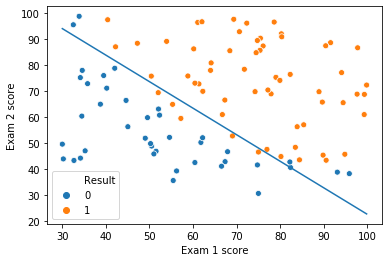

In [118]:
sns.scatterplot(x=df['Exam 1 score'], y=df['Exam 2 score'], hue=df['Result'])
y_points = [(optimal_theta[1]*x+optimal_theta[0])/(-1*optimal_theta[2]) for x in df['Exam 1 score']]
sns.lineplot(x=df['Exam 1 score'], y=y_points)

Finally redo the same exercise using in-built Logistic Regression method of scikit-learn library

In [111]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True, C = 1e15)
clf.fit(np.array(df[['Exam 1 score', 'Exam 2 score']]), np.array(df[['Result']]).ravel())

optimal_theta2 = np.concatenate((clf.intercept_, clf.coef_.ravel()))
print("optimal_theta", optimal_theta2)
print("final cost", computecost(optimal_theta2, X, y))
print("The admission probability for a student with exam scores 1 of 45 and exam score 2 of 85 is", sigmoid(testX.dot(optimal_theta2)))

optimal_theta [-25.16138567   0.20623222   0.20147191]
final cost 0.20349770159026442
The admission probability for a student with exam scores 1 of 45 and exam score 2 of 85 is [0.77629013]


## Logistic Regression with Regularization

Read data containing Microchip test and its acceptance results

In [129]:
df2 = pd.read_csv('ex2data2.txt', names=['Microchip Test 1', 'Microchip Test 2', 'Result'])
df2.head()

,Microchip Test 1,Microchip Test 2,Result
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


Visualize the data using scatter plot

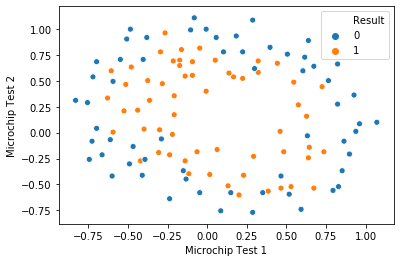

In [130]:
sns.scatterplot(x=df2['Microchip Test 1'], y=df2['Microchip Test 2'], hue=df2['Result'])

A simple staright linw won't fit this complex data.
Using Polynomial features, transform this into a 6th degree polynomial with a total of 28 features.

In [315]:
from sklearn.preprocessing import PolynomialFeatures
degree = 6
poly = PolynomialFeatures(degree)
X = df2[['Microchip Test 1', 'Microchip Test 2']]
print("Old shape", X.shape)
X = poly.fit_transform(X)
print("New shape", X.shape)
y = df2[['Result']]
numFeat = X.shape[1]

Old shape (118, 2)
New shape (118, 28)


Define updated cost function for regularized logistic regression
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^m[-y^{(i)}log(h_\theta(x^{(i)})) - (1 - y^{(i)})log(1 - h_\theta(x^{(i)})] + \frac{\lambda}{2m}\sum_{j=1}^n\theta_j^2 $$

In [316]:
def computecostreg(theta, X, y, l):
    # Reshape the theta vector into 2D array 
    theta = theta.reshape((numFeat,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute the cost value
    cost_a = y * np.log(yhat)
    cost_b = (1 - y) * np.log(1 - yhat)
    cost = (np.sum(cost_a) + np.sum(cost_b))/(-X.shape[0])
    
    theta_sub = theta[1:,:]
    regparam = np.sum(theta_sub * theta_sub)
    cost += (regparam * l)/(2 * X.shape[0])
    return cost  

Calculate example cost for zero  𝜃  vector

In [317]:
theta = np.zeros(numFeat)
computecostreg(theta, X, y, 1)

Result    0.693147
dtype: float64

Define updated gradient function for regularized logistic regression
for j  = 0 $$Gradient = \frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}]$$
for j >= 1 $$Gradient = \frac{1}{m}\sum_{i=1}^m[(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}] + \frac{\lambda}{m}\theta_j $$

In [318]:
def gradientreg(theta, X, y, l):
    # Reshape the theta vector into 2D array
    theta = theta.reshape((numFeat,1))
    
    # Compute hypothesis
    yhat = sigmoid(X.dot(theta))
    
    # Compute error vector
    diff = yhat - y
    
    # Compute gradient and return it in 1D format
    grad = (X.T.dot(diff))/(X.shape[0])
    theta_sub = theta[1:,:]
    grad[1:,:] += (theta_sub * l)/(X.shape[0])
    return grad.flatten()

Use the optimization method in scipy library.

In [319]:
init_theta = np.zeros(numFeat)
l = 0
Result = op.minimize(fun = computecostreg, 
                                 x0 = init_theta, 
                                 args = (X, y, l),
                                 method = 'TNC',
                                 jac = gradientreg);
optimal_theta = Result.x;
#Result = op.fmin_tnc(func=computecostreg, x0=init_theta, fprime=gradientreg, args=(X, y, l))
#optimal_theta = Result[0];

print("optimal_theta", optimal_theta)
print("final cost", computecostreg(optimal_theta.reshape((numFeat, 1)), X, y, l))

optimal_theta [   15.57174933    24.85620033     5.94111049  -163.29329863
   -81.17214704   -69.15237172  -199.06103107  -127.37326001
   -69.81179388     7.92132176   601.70946993   499.73902187
   657.44263112   271.47843965    97.61153432   359.78136629
   409.21405028   460.6515267    229.43257812    78.12849567
    -9.89152971  -739.49171604  -865.64032492 -1254.44288682
  -893.81718586  -833.20249236  -320.63607362   -58.14478816]
final cost Result    0.253926
dtype: float64


Function to plot the decision boundary. The below code is referred from:
https://www.kaggle.com/ashishrane7/logistic-regression-non-linear-decision-boundary

In [377]:
# define a function to plot the decision boundary
def plotDecisionBoundary(theta, degree, ax):
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)   
    U,V = np.meshgrid(u,v)
    
    # convert U, V to vectors for calculating additional features
    # using vectorized implementation
    U = np.ravel(U)
    V = np.ravel(V)
    Z = np.zeros((len(u) * len(v)))
    
    # Map the two features to multiple features using
    # PolynomialFeatures
    poly = PolynomialFeatures(degree)
    uv = np.hstack((U.reshape(len(U), 1), V.reshape(len(V), 1)))
    X_poly = poly.fit_transform(uv)
    Z = X_poly.dot(theta)
    
    # reshape U, V, Z back to matrix
    U = U.reshape((len(u), len(v)))
    V = V.reshape((len(u), len(v)))
    Z = Z.reshape((len(u), len(v)))
    
    cs = ax.contour(U,V,Z,levels=[0],cmap= "Greys_r")
    return cs

Text(0, 0.5, 'Microchip Test 2')

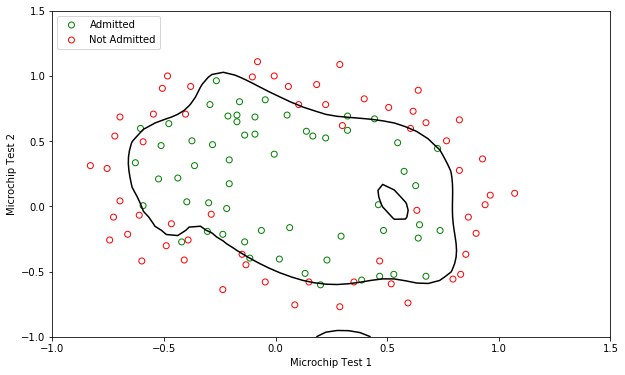

In [388]:
# Plot Decision boundary
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111)
df_true = df2[df2["Result"]==1]
df_false = df2[df2["Result"]==0]
ax.scatter(df_true['Microchip Test 1'], df_true['Microchip Test 2'], marker='o', facecolors='none', edgecolors='g', label="Admitted")
ax.scatter(df_false['Microchip Test 1'], df_false['Microchip Test 2'], marker='o', facecolors='none', edgecolors='r', label="Not Admitted")
cs = plotDecisionBoundary(optimal_theta, degree, ax)
plt.legend(loc="upper left")
plt.xlabel("Microchip Test 1")
plt.ylabel("Microchip Test 2")